# Midterm 1 - Assignment 1
## Diego Arcelli - 647979

Time series prediction using Hidden Markov Models

### Importing needed modules and dowloading the dataset

In [1]:
import matplotlib.pyplot as plt
from hmmlearn import hmm
import numpy as np
import pandas as pd
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

### Extracting the columns of appliances and ligths

We extract from the dataset the sequences of appliances and lights and we convert the into numpy arrays

In [2]:
dataset = pd.read_csv("energydata_complete.csv")
lights = dataset["lights"].to_numpy()
appliances = dataset["Appliances"].to_numpy()

### Defining the function to train the HMM with Gaussian emissions

We define a function to fit and HMM on the given sequence. To fit the model we specify a certain number of HMMs.

In [3]:
'''
function to create and fit the HMM with gaussian emissions for the passed sequence
- data: the sequence to use to fit the model
- n_states: the number of hidden states of the HMM
'''

def get_model(data, n_states):
    # creation of the model specifying the algorithm to use for the decoding (viterbi)
    model = hmm.GaussianHMM(n_components=n_states, algorithm="viterbi", n_iter=1000)
    model.fit(data.reshape(-1,1))
    return model

### Fitting models for lights and appliances

For each sequence we will fit a model with 2, 3, 4 and 5 hidden sates.

In [4]:
# list which contains the number of states of each model
n_states = [2, 3, 4, 5]

# list of models for appliances
appliances_models = [get_model(appliances.reshape(-1,1), n_state) for n_state in n_states]

#list of models for lights
lights_models = [get_model(lights.reshape(-1,1), n_state) for n_state in n_states]

### Defining function to plot the HMMs predictions

We define a function to visualize the predictions of the HMMs by plotting the time series and assigning to each point a different color accordingly to the prediction of the model

In [5]:
'''
function that plots a time series assigning to each point a different color
based on the prediction of the HMM. Parameters:
- data: the time series to predict
- models: a list of trained HMMs
- name: the name of the sequence
'''

def plot_models(data, models, name):
    colors = ["red", "green", "blue", "yellow", "purple"]
    for model in models:
        pred = model.predict(data.reshape(-1,1))
        for i in range(len(pred)):
            plt.plot(i, data[i], color=colors[pred[i]], marker="o")
        txt=f"{name}, model with {model.n_components} hidden states"
        plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
        plt.show()

### Plotting the graphs
We plot the graphs over the data of the first month

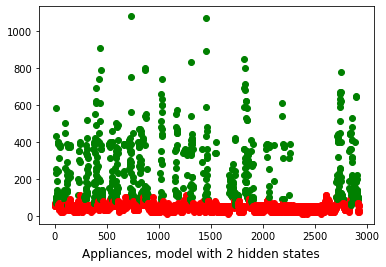

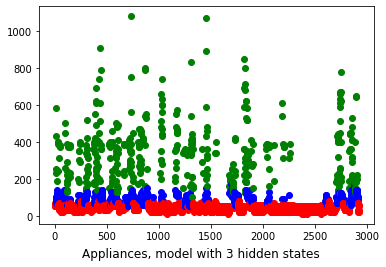

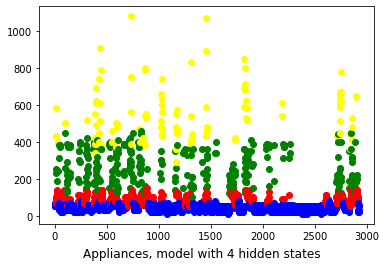

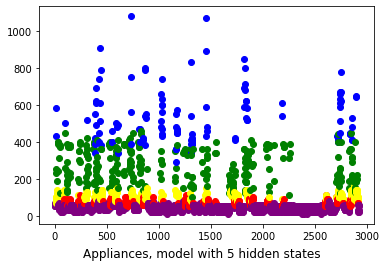

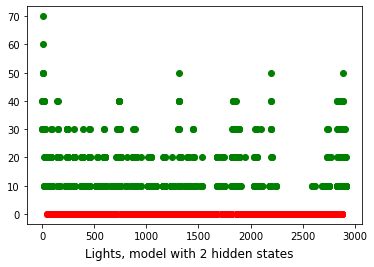

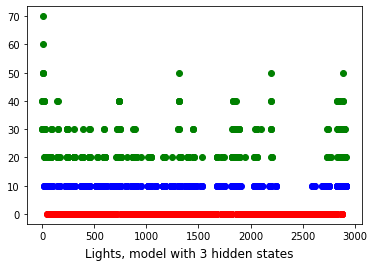

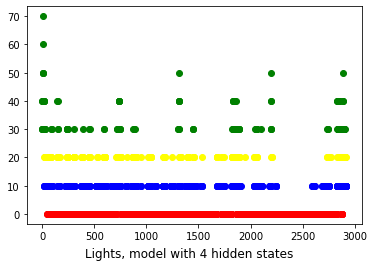

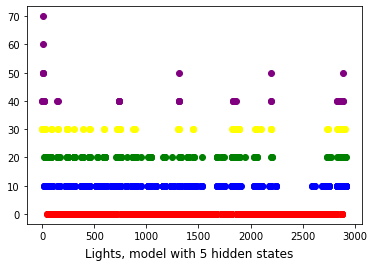

In [6]:
plot_models(appliances[:2921], appliances_models, "Appliances")
plot_models(lights[:2921], lights_models, "Lights")

### Considerations

As we can see from the plots, the model is able to recognize different levels of the values of the sequences (for example with a 2 model we're able to distinguish between low and high values). As we increase the number of hidden states the model is able to recognize more levels

### Plot to compare actual data with model predictions

We plot on a graph the time series of the actual data and the time series of the predictions of the model. In order to visualize the two time series on the same scale, each value predicted by the HMM is rescaled accordingly to the minimum and maximum values of the data. For example with 5 states model, if the minimum and maximum values are 0 and 10, the values plotted for the HMM will be 0, 25, 50, 75 and 100.

In [7]:
def compare_data(data, model, val_range, column):
    plt.plot(data, label="Actual data")
    mapping = np.linspace(val_range[0], val_range[1], model.n_components)
    pred = model.predict(data.reshape(-1,1))
    pred = [mapping[val] for val in pred]
    plt.plot(pred, label=f"{model.n_components} hidden states")
    txt=f"{column}, model with {model.n_components} hidden states"
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.legend()
    plt.show()

### Plotting the comparison graphs

We plot the graphs on a sequence of 100 days

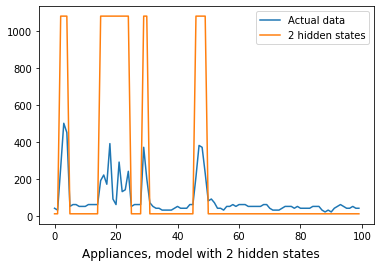

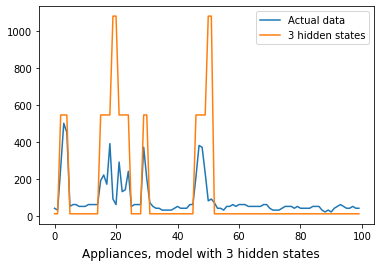

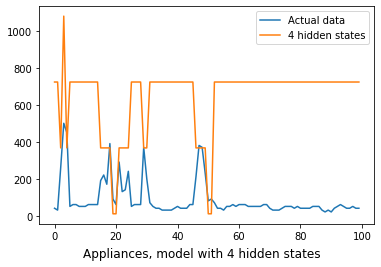

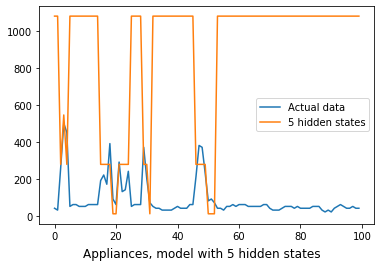

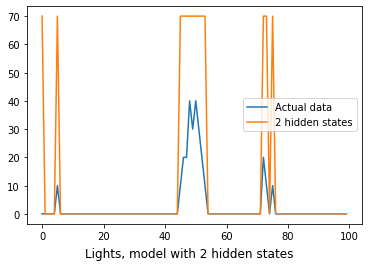

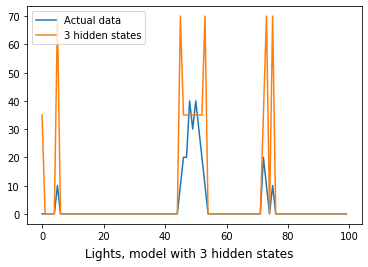

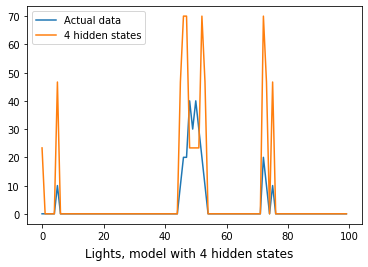

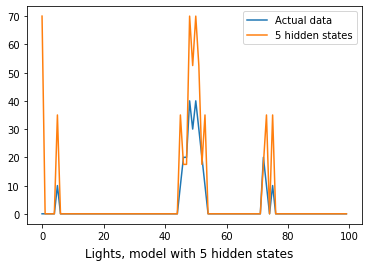

In [9]:
appliances_range = [appliances.min(), appliances.max()]
lights_range = [lights.min(), lights.max()]

for model in appliances_models:
    compare_data(appliances[100:200], model, appliances_range, "Appliances")

for model in lights_models:
    compare_data(lights[100:200], model, lights_range, "Lights")

### Considerations

As we can see from the plots, models with few hidden states are only able to roughly approximate the data, even though they seems to be able to detect major variations of the data. As we increase the number of hidden states the sequence predicted by the model better approximate the real data, even thou the in some points there are big discrepancies (for example in the plot for appliances with models of 4 and 5 states). <br>
In general the model is able to approximate better the sequence related to light than the seqeunce of appliances, probably because the number of distintct values for lights (which is 8) is very close to the number of hidden states of the model (expecially the in the last plot for the model with 5 hidden states the two time series are very similar)